Total amount of images: 354


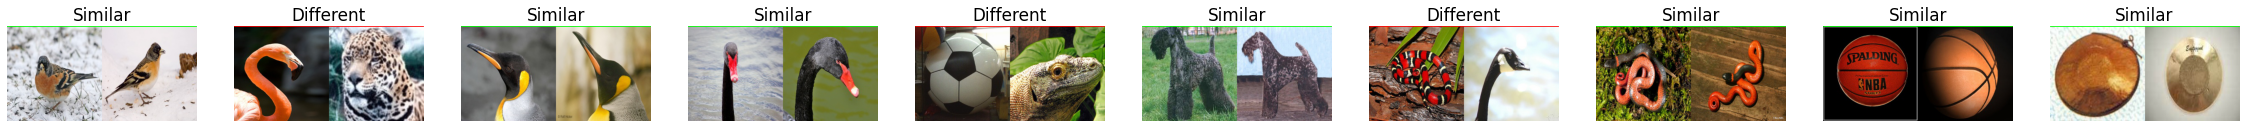

In [1]:
import sys
sys.path.append('../../utility')
import util
import numpy as np

folders = util.load_images('../../data/dataset_pairs')
data, labels = util.create_pairs(folders)
data, labels = util.shuffle_data(data, labels)
data_split, labels_split = util.split_data(data, labels)
data_train, data_val, data_test = data_split
labels_train, labels_val, labels_test = labels_split

print('Dataset contains', data.shape[0], 'image pairs')
print('Train contains', data_train.shape[0], 'image pairs')
print('Validation contains', data_val.shape[0], 'image pairs')
print('Test contains', data_test.shape[0], 'image pairs')

util.visualize(data_train, labels_train)

In [2]:
from keras.models import load_model

embedding_extractor = load_model('./binary_cross_entropy_loss_embedding_extractor.h5')

In [3]:
similarity = util.get_similarity_from_embedding(embedding_extractor, data_test)

Took 57.91 seconds to predict 708 image pairs
Prediction time: 0.08 seconds


Best accuracy: 0.9689265536723164
embedding_extractor_similarity
- Amount of TP: 344
- Amount of TN: 342
- Amount of FP: 12
- Amount of FN: 10
- AUC score: 0.9936320980561142
- Accuracy: 0.9689265536723164
- Recall: 0.9717514124293786
- Precision: 0.9662921348314607
- F1: 0.9690140845070423
- Kappa: 0.9378531073446328


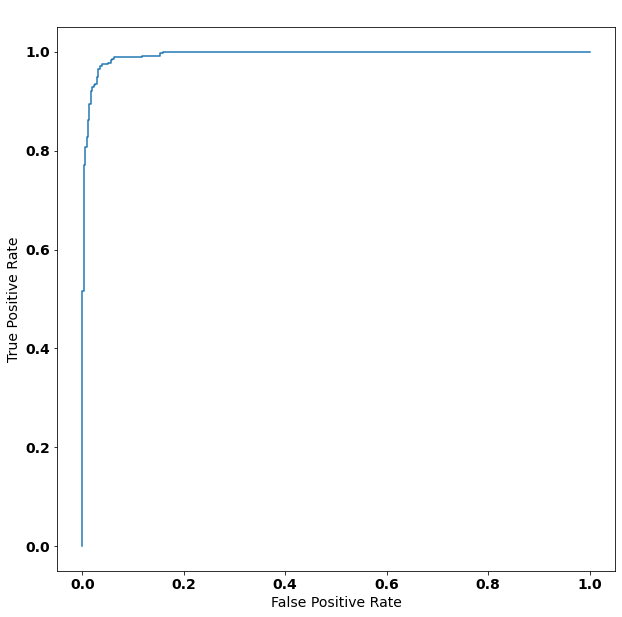

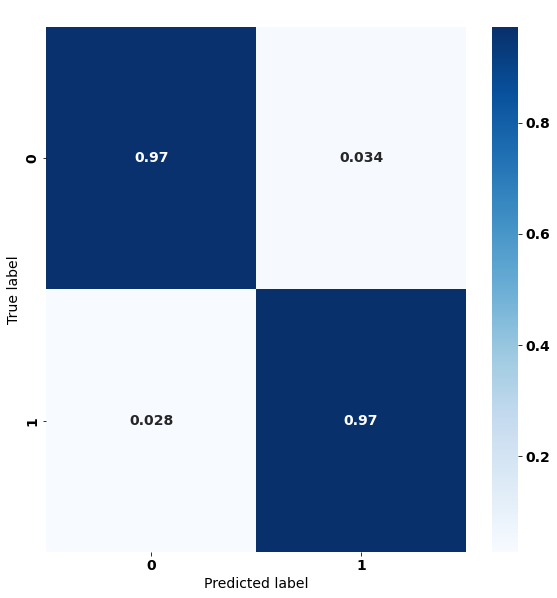

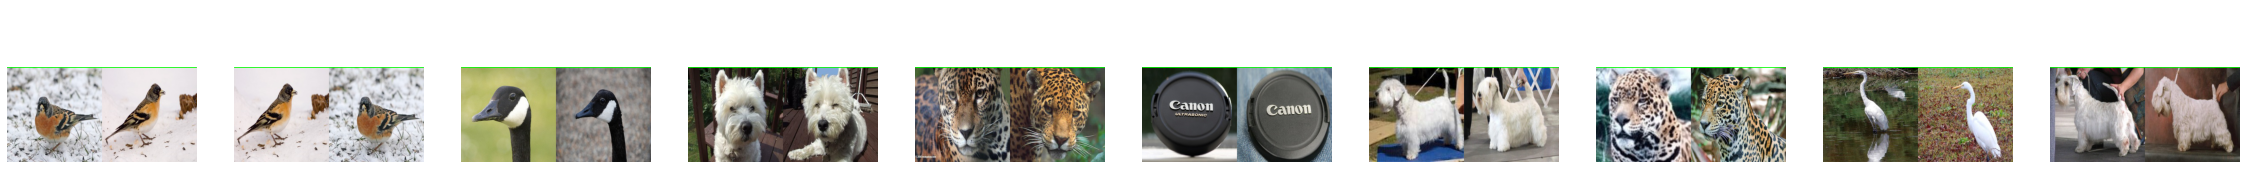

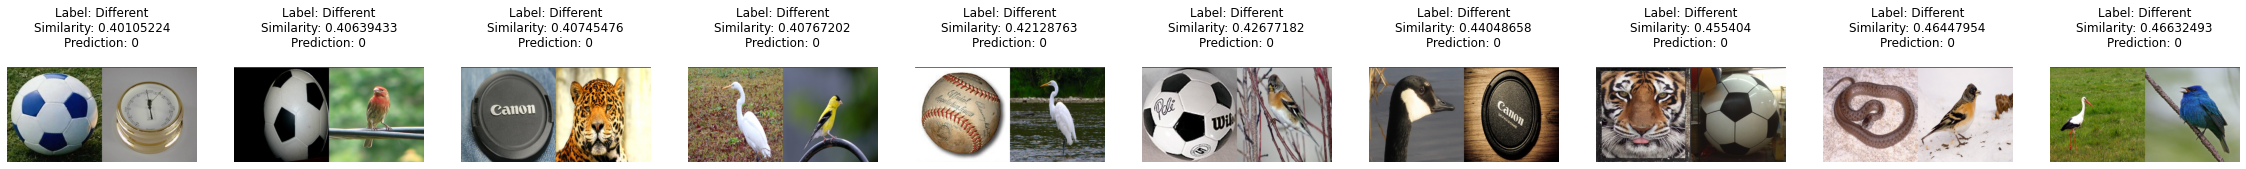

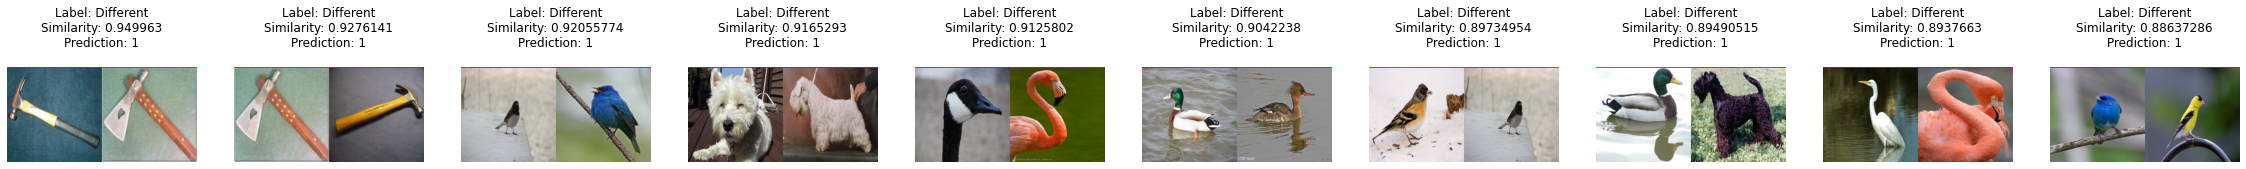

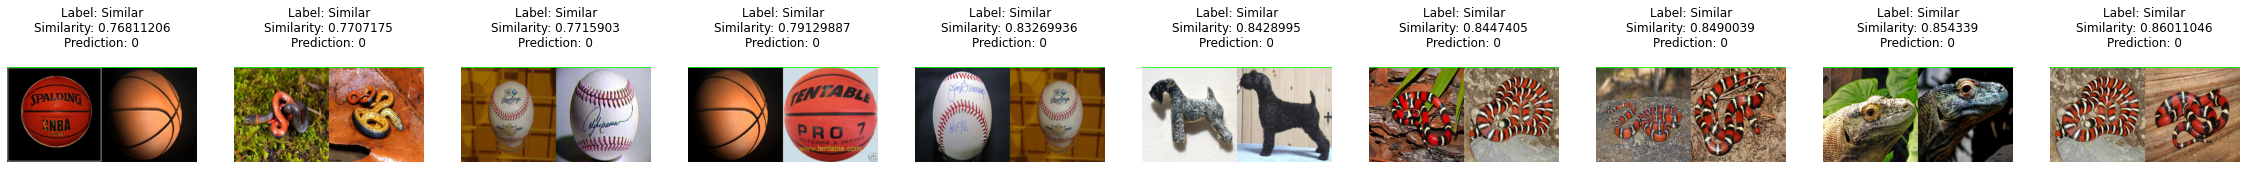

Threshold:  0.8650000000000007


In [4]:
util.evaluate(data=data, labels=labels, similarity=similarity, name="binary cross-entropy")